# Predicting Fire Alarms Using Multi-Sensor Data A Binary Classification

## Importing libraries

In [2]:
# Reading the data and dataset manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [3]:
data = pd.read_csv('smoke_detection_iot.csv', index_col=0)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Exploring the dataset

In [4]:
data.shape

(62630, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [6]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [7]:
#checking null values

In [8]:
data.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [9]:
data[data.duplicated()].sum()

UTC               0.0
Temperature[C]    0.0
Humidity[%]       0.0
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     0.0
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
Fire Alarm        0.0
dtype: float64

No duplicates are present in the dataset

In [10]:
data.corr()['Fire Alarm'][:-1].sort_values(ascending=False)

CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

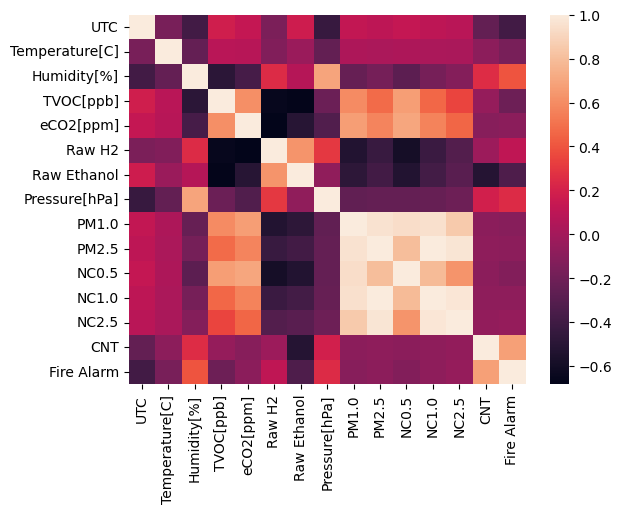

In [11]:
ax = sns.heatmap(data.corr())

In [12]:
target_column = 'Fire Alarm'
X = data.loc[:, data.columns != target_column]
y = data[[target_column]]

In [13]:
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [14]:
y

,Fire Alarm
0,0
1,0
2,0
3,0
4,0
...,...
62625,0
62626,0
62627,0
62628,0


## Scaling the feature columns

In [15]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


## Check for unbalanced classes

In [16]:
data['Fire Alarm'].value_counts(normalize=True)

1    0.714626
0    0.285374
Name: Fire Alarm, dtype: float64

Here we can see that there is an imbalance in the classes of our target label

## Split data into train and test splits

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(50104, 14)

In [19]:
y_train.shape

(50104, 1)

# LogisticRegression

In [20]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=accuracy_score(y_test,y_pred)*100
print('Accuracy:',ac)

Accuracy: 96.43142264090692


In [22]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3575
           1       0.99      0.96      0.97      8951

    accuracy                           0.96     12526
   macro avg       0.95      0.97      0.96     12526
weighted avg       0.97      0.96      0.96     12526



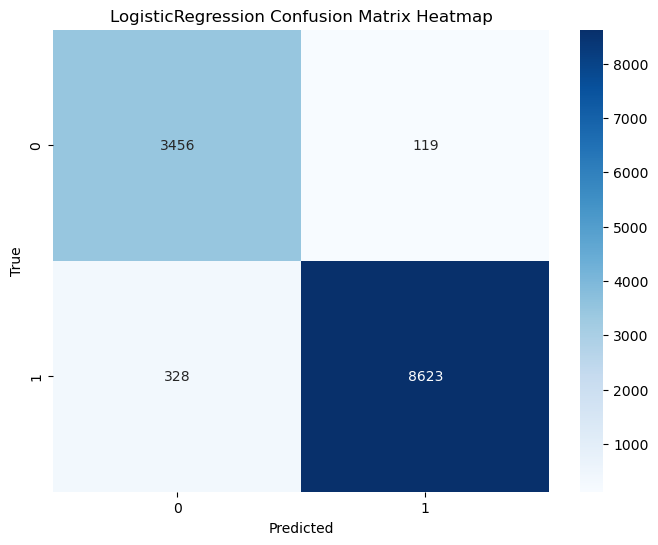

In [23]:
cm=confusion_matrix(y_test,y_pred)
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LogisticRegression Confusion Matrix Heatmap')
plt.show()

In [24]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred1=rf.predict(X_test)
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred1)*100
print('Accuracy:',acc1)

Accuracy: 100.0


In [26]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



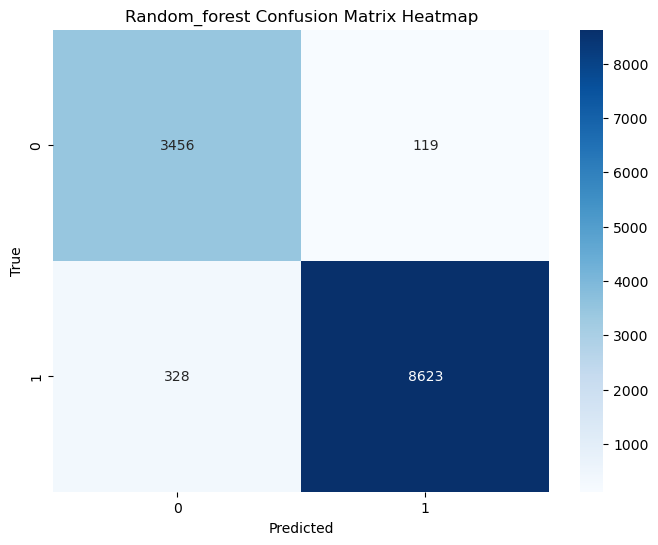

In [27]:
cm1=confusion_matrix(y_test,y_pred1)
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random_forest Confusion Matrix Heatmap')
plt.show()

In [28]:
y_pred1

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [29]:
prediction_df=pd.DataFrame({'Predicted':y_pred1})

In [30]:
prediction_df

,Predicted
0,1
1,1
2,0
3,0
4,1
...,...
12521,1
12522,1
12523,0
12524,1
